# Chebyshev Polynomials and LSTM Training

## Introduction

This Jupyter notebook guides users through the process of displaying a Chebyshev polynomial of the second kind, training a Long Short-Term Memory (LSTM) model on that polynomial, and subsequently testing the LSTM model on the original polynomial with varying parameters. It begins with importing essential libraries such as numpy, matplotlib, tensorflow, and keras. Following this, it defines a function to generate and display the Chebyshev polynomial using numpy and matplotlib. The notebook then focuses on data preparation for the LSTM, including generating a dataset from the polynomial, splitting it into training and testing sets, and reshaping it to fit the LSTM's input requirements. An LSTM model is then built and compiled using keras, followed by training the model with appropriate callbacks to monitor progress. Finally, the notebook evaluates the model's performance on test data, displaying loss and accuracy metrics, and tests the model on the polynomial with different parameters, comparing and visualizing the results.


## Generate Chebyshev Polynomial of the Second Kind

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from scipy.special import chebyt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam


2024-05-27 14:08:20.256294: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


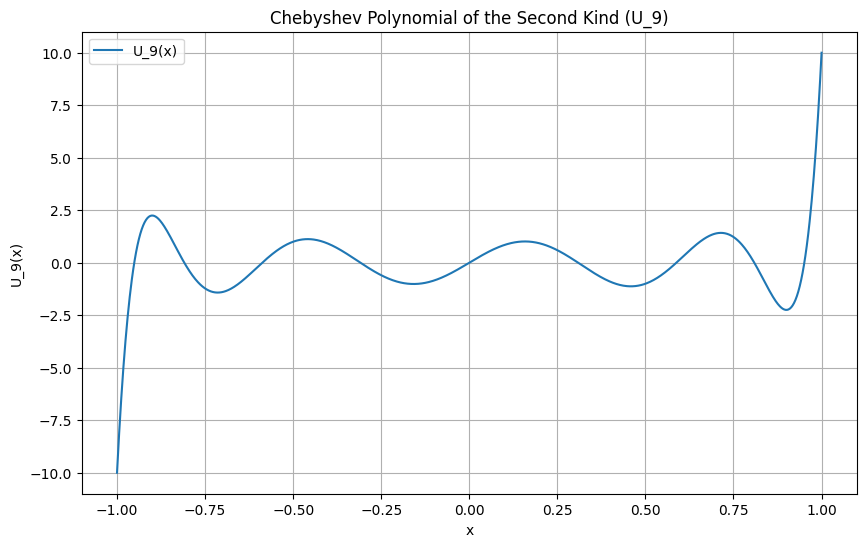

In [2]:
def chebyshev_polynomial_second_kind(n, x):
    """
    Generate Chebyshev polynomial of the second kind of degree n.
    
    Parameters:
    n (int): Degree of the polynomial.
    x (numpy array): Input values where the polynomial is evaluated.
    
    Returns:
    numpy array: Values of the Chebyshev polynomial of the second kind at x.
    """
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return 2 * x
    else:
        U_n_minus_1 = 2 * x
        U_n_minus_2 = np.ones_like(x)
        for _ in range(2, n + 1):
            U_n = 2 * x * U_n_minus_1 - U_n_minus_2
            U_n_minus_2, U_n_minus_1 = U_n_minus_1, U_n
        return U_n

def plot_chebyshev_polynomial(n, x_range=(-1, 1), num_points=1000):
    """
    Plot the Chebyshev polynomial of the second kind of degree n.
    
    Parameters:
    n (int): Degree of the polynomial.
    x_range (tuple): Range of x values.
    num_points (int): Number of points to plot.
    """
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = chebyshev_polynomial_second_kind(n, x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'U_{n}(x)')
    plt.title(f'Chebyshev Polynomial of the Second Kind (U_{n})')
    plt.xlabel('x')
    plt.ylabel(f'U_{n}(x)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_chebyshev_polynomial(n=9)

## Prepare Data for LSTM

In [3]:
def generate_chebyshev_data(degree, n_samples, noise=0.0):
    x = np.linspace(-1, 1, n_samples)
    y = chebyt(degree)(x) + noise * np.random.randn(n_samples)
    return x, y

In [4]:
degree = 3
n_samples = 1000
noise = 0.1

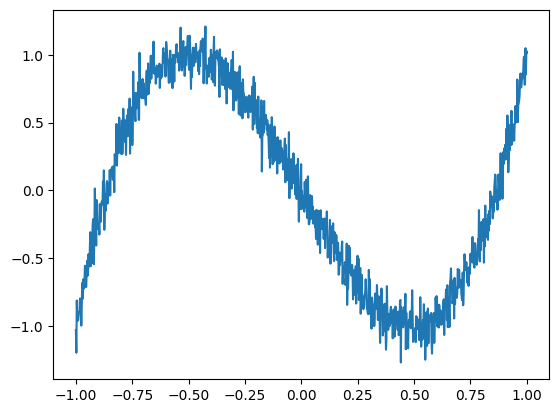

In [5]:
x, y = generate_chebyshev_data(degree, n_samples, noise)

plt.plot(x,y)

In [6]:
test_size = 0.2
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle=False)


num_test_samples = int(len(x) * test_size)

# Generate random indices for the test set
test_indices = np.random.choice(len(x), size=num_test_samples, replace=False)
test_indices.sort()  # Ensure the order is preserved

# Generate train indices
train_indices = np.setdiff1d(np.arange(len(x)), test_indices)

# Split the data using the indices
x_train, x_test = x[train_indices], x[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

print(f'x_train.shape: {x_train.shape}, x_test.shape: {x_test.shape}')
print(f'y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}')

x_train.shape: (800,), x_test.shape: (200,)
y_train.shape: (800,), y_test.shape: (200,)


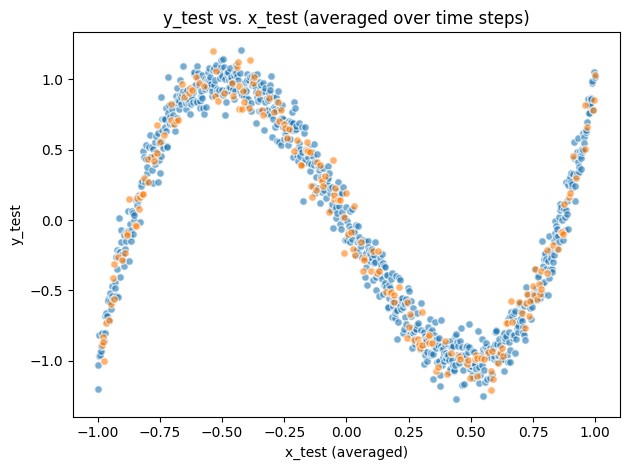

In [7]:

plt.scatter(x_train, y_train, alpha=0.6, edgecolors='w', s=30)
plt.title('y_train vs. x_train (averaged over time steps)')
plt.xlabel('x_train (averaged)')
plt.ylabel('y_train')


plt.scatter(x_test, y_test, alpha=0.6, edgecolors='w', s=30)
plt.title('y_test vs. x_test (averaged over time steps)')
plt.xlabel('x_test (averaged)')
plt.ylabel('y_test')

plt.tight_layout()
plt.show()

## Build LSTM Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [9]:
def build_lstm_model(input_shape, lstm_units=50, dense_units=1, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=lstm_units, input_shape=input_shape))
    model.add(Dense(units=dense_units))
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='mean_squared_error', 
                  metrics=['accuracy'])
    return model
    

In [10]:

def build_simple_rnn_model(input_shape, rnn_units=100, dense_units=1, learning_rate=0.001):
    model = Sequential()
    model.add(SimpleRNN(units=rnn_units, input_shape=input_shape))
    model.add(Dense(units=dense_units, activation='relu'))
   
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='mean_squared_error', 
                  metrics=['accuracy'])
    return model


In [11]:
input_shape = (1, 1)
model = build_simple_rnn_model(input_shape)
#model = build_lstm_model(input_shape)
print(model.input_shape, model.output_shape)
model.summary()

(None, 1, 1) (None, 1)


/Users/max/proj/PINNiped/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

## Train LSTM Model

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [13]:
#input_shape = (x_train.shape[1], x_train.shape[2])


In [14]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_lstm_model.keras', monitor='val_loss', save_best_only=True)
]

In [15]:
# Reshape the data
x_train_r = x_train.reshape((x_train.shape[0], 1, 1))
x_test_r = x_test.reshape((x_test.shape[0], 1, 1))

x_train.shape, x_train_r.shape

((800,), (800, 1, 1))

In [16]:

history = model.fit(
    x_train_r, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test_r, y_test),
    callbacks=callbacks
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0000e+00 - loss: 0.4922 - val_accuracy: 0.0000e+00 - val_loss: 0.4663
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4996 - val_accuracy: 0.0000e+00 - val_loss: 0.4663
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5115 - val_accuracy: 0.0000e+00 - val_loss: 0.4663
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5074 - val_accuracy: 0.0000e+00 - val_loss: 0.4663
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5186 - val_accuracy: 0.0000e+00 - val_loss: 0.4663
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4927 - val_accuracy: 0.0000e+00 - val_loss: 0.4663
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5128 - val_accuracy: 0.0000e+00 - val_loss: 0.4663
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - a

In [17]:
model.save('final_lstm_model.keras')

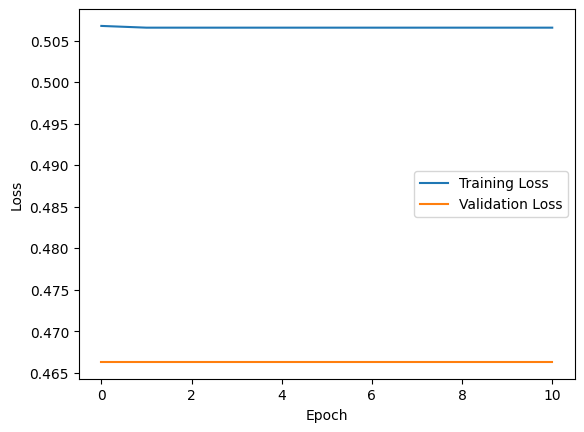

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate LSTM Model

In [19]:
import matplotlib.pyplot as plt

In [20]:
# Evaluate the model on the test data

loss, accuracy = model.evaluate(x_test_r, y_test, verbose=0)
loss, accuracy

(0.4662899374961853, 0.0)

In [21]:
# Print loss and accuracy
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.4663
Test Accuracy: 0.0000


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


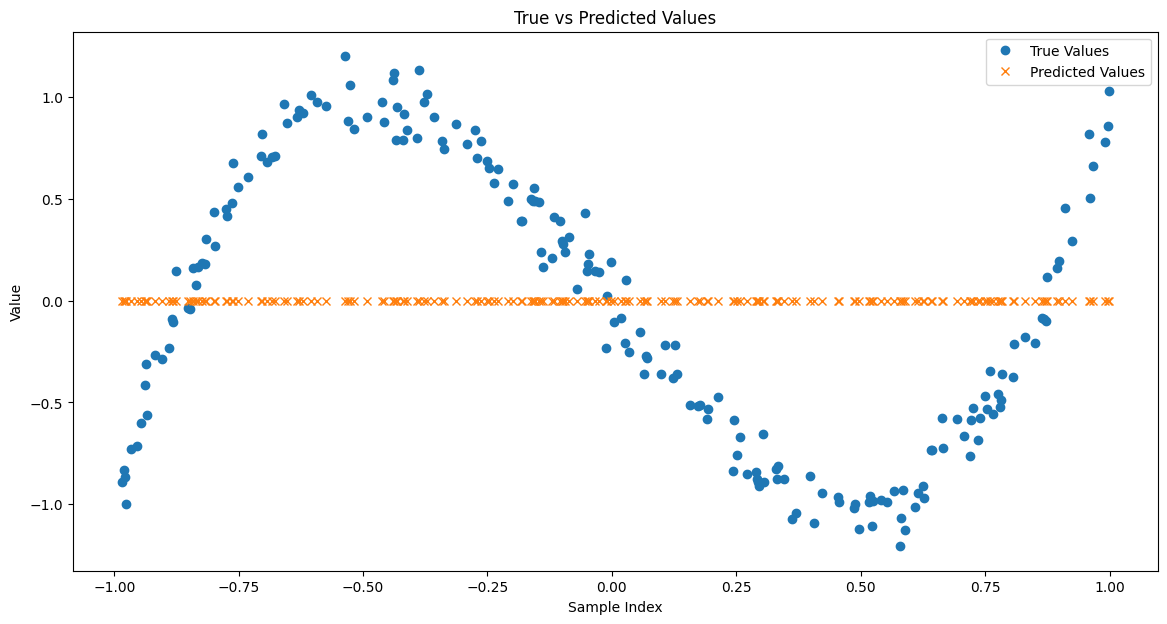

In [22]:

predictions = model.predict(x_test_r)

predictions_flat = predictions.reshape(-1)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(x_test_r.flatten(), y_test, label='True Values', linestyle='', marker='o')
plt.plot(x_test_r.flatten(), predictions_flat, label='Predicted Values', linestyle='', marker='x')
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## Test on Different Parameters

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [24]:
def chebyshev_second_kind(x, degree):
    if degree == 0:
        return np.ones_like(x)
    elif degree == 1:
        return 2 * x
    else:
        return 2 * x * chebyshev_second_kind(x, degree-1) - chebyshev_second_kind(x, degree-2)

In [25]:
model = load_model('lstm_chebyshev_model.h5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'lstm_chebyshev_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
degrees = [2, 4, 6, 8]
x_test = np.linspace(-1, 1, 100).reshape(-1, 1)

In [ ]:
def predict_with_lstm(model, x):
    x_reshaped = x.reshape((1, -1, 1))
    predictions = model.predict(x_reshaped)
    return predictions.flatten()

In [ ]:
plt.figure(figsize=(12, 8))

In [ ]:
for degree in degrees:
    y_true = chebyshev_second_kind(x_test, degree)
    y_pred = predict_with_lstm(model, x_test)
    
    plt.plot(x_test, y_true, label=f'True (Degree {degree})')
    plt.plot(x_test, y_pred, linestyle='dashed', label=f'Predicted (Degree {degree})')

In [ ]:
plt.title('Chebyshev Polynomial of the Second Kind: True vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()